<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#pandas" data-toc-modified-id="pandas-1">pandas</a></span><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1.1">Loading data</a></span><ul class="toc-item"><li><span><a href="#Text" data-toc-modified-id="Text-1.1.1">Text</a></span></li><li><span><a href="#Excel" data-toc-modified-id="Excel-1.1.2">Excel</a></span></li><li><span><a href="#The-internet" data-toc-modified-id="The-internet-1.1.3">The internet</a></span></li></ul></li><li><span><a href="#DataFrames" data-toc-modified-id="DataFrames-1.2">DataFrames</a></span><ul class="toc-item"><li><span><a href="#Indexing" data-toc-modified-id="Indexing-1.2.1">Indexing</a></span><ul class="toc-item"><li><span><a href="#Columns" data-toc-modified-id="Columns-1.2.1.1">Columns</a></span></li><li><span><a href="#Rows" data-toc-modified-id="Rows-1.2.1.2">Rows</a></span></li><li><span><a href="#pandas-madness" data-toc-modified-id="pandas-madness-1.2.1.3">pandas madness</a></span></li></ul></li><li><span><a href="#Boolean-indexing" data-toc-modified-id="Boolean-indexing-1.2.2">Boolean indexing</a></span></li></ul></li><li><span><a href="#Summaries" data-toc-modified-id="Summaries-1.3">Summaries</a></span><ul class="toc-item"><li><span><a href="#Numbers" data-toc-modified-id="Numbers-1.3.1">Numbers</a></span></li><li><span><a href="#Categories" data-toc-modified-id="Categories-1.3.2">Categories</a></span></li><li><span><a href="#Grouping" data-toc-modified-id="Grouping-1.3.3">Grouping</a></span></li></ul></li></ul></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-2">Data visualization</a></span><ul class="toc-item"><li><span><a href="#matplotlib" data-toc-modified-id="matplotlib-2.1">matplotlib</a></span></li></ul></li></ul></div>

In [1]:
import os

os.chdir('examples')

# Data analysis

Our next special topic is how to analyze simple data sets in Python.

## pandas

As you may have noticed by now, the first step for almost any specialist task in Python is to [import](extras/glossary.ipynb#import) an additional [package](extras/glossary.ipynb#package) that provides some extra functionality. The most popular package for loading and working with tables of data is called `pandas`. We met it briefly already in the lesson on files, when we learned about [delimited text data files](files.ipynb#delimited-text).

### Loading data

#### Text

Recall that a delimited text file stores a table of data as plain text, with one particular character (most often the comma) reserved as a [separator](extras/glossary.ipynb#separator) to mark the boundaries between the columns of the table. Here is an example data file in which the separator is a comma (a *csv* file):

In [2]:
import os

filepath = os.path.join('data', 'penguins.csv')

with open(filepath) as f:
    for linenum in range(6):
        print(f.readline(), end='')

Bird,HeartRate,Depth,Duration
EP19,88.8,5,1.05
EP19,103.4,9,1.1833333
EP19,97.4,22,1.9166667
EP19,85.3,25.5,3.4666667
EP19,60.6,30.5,7.0833333


This file stores a table of data on the [heart rates of penguins during fishing dives](https://doi.org/10.1242/jeb.013235). Each row represents one dive, with the following columns:

* *Bird*: An ID code for the penguin making the dive.
* *HeartRate*: The penguin's heart rate during the dive, in beats per minute (bpm).
* *Depth*: The depth of the dive (in meters).
* *Duration*: The duration of the dive (in minutes).

Let's import `pandas` and use its `read_csv()` function to read this file:

In [3]:
import pandas

penguins = pandas.read_csv(filepath)

print(penguins)

       Bird  HeartRate  Depth   Duration
0      EP19       88.8    5.0   1.050000
1      EP19      103.4    9.0   1.183333
2      EP19       97.4   22.0   1.916667
3      EP19       85.3   25.5   3.466667
4      EP19       60.6   30.5   7.083333
..      ...        ...    ...        ...
120  EP3901       48.4  170.0  11.533333
121  EP3901       50.8   37.0   8.216667
122  EP3901       49.6  160.0  11.300000
123  EP3901       56.4  180.0  10.283333
124  EP3901       55.2  170.0  10.366667

[125 rows x 4 columns]


(The `...` indicates that some rows have not been shown, in order to keep the printout brief.)

#### Excel

As well as `read_csv()`, `pandas` provides many functions for reading data from different sources. You may sometimes need to read from a Microsoft Excel spreadsheet file. There is a function for this:

In [4]:
penguins_excel = pandas.read_excel(os.path.join('data', 'penguins.xlsx'))

`read_excel()` can take additional [arguments](extras/glossary.ipynb#argument) for specifying which sheet of the Excel file to read, which rows or columns to skip, etc. in case your spreadsheet is a little messy. As always with new functions, it is a good idea to seek out and read the [online documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) to see what the possibilities are and whether there are any important defaults.

#### The internet

Some `pandas` [IO](extras/glossary.ipynb#io) functions can even read from a file stored online. The first [argument](extras/glossary.ipynb#argument) is the [URL](extras/glossary.ipynb#url) to the file:

In [5]:
url = 'https://raw.githubusercontent.com/luketudge/introduction-to-programming/master/content/examples/data/penguins.csv'

penguins_from_the_internet = pandas.read_csv(url)

### DataFrames

What [type](extras/glossary.ipynb#type) of object do `pandas`' read functions give us?

In [6]:
type(penguins)

pandas.core.frame.DataFrame

They give us a 'data frame'. A [data frame](extras/glossary.ipynb#dataframe) is very similar to a [matrix](extras/glossary.ipynb#matrix). Like a matrix, a data frame stores values in a 'grid' of rows and columns. But whereas the structure of a matrix may represent all sorts of things, the roles of rows and columns are slightly more specific in a data frame.

Each *row* of a data frame represents one 'observation'. An observation is some coherent entity or event for which information was recorded. Each *column* of a data frame represents one measurement or piece of information that was recorded for each of the observations. For example, the observations in a data frame might be people, for whom some physical or demographic measurements were made, or they might be events like purchases in a store, for each of which a customer ID, product, price, etc. were recorded. In the penguins data frame, the observations are dives. (Note that the observations are not penguins, as it might be tempting to think; depth and duration are clearly attributes of individual dives, not of penguins).

Each row of a data frame may contain values of heterogeneous [types](extras/glossary.ipynb#type), since not every piece of information recorded about each observation is necessarily of the same kind. For example, the penguins data frame records a [string](extras/glossary.ipynb#string) ID for the bird making the dive, but the other values are [floats](extras/glossary.ipynb#float). The values in a single column *are* necessarily of the same type, since we usually want to compare them with each other. For example, we would not be able to compare the dive depths of different penguins if some depths were recorded as floats, and others as strings such as `'quite deep'` or `'really deep'`.

#### Indexing

##### Columns

We can get individual columns from a `pandas.DataFrame` using the same square parenthesis [indexing](extras/glossary.ipynb#index) as for other Python types. For example, to get a single column, the index is just the name of the column, as a [string](extras/glossary.ipynb#string):

In [7]:
print(penguins['Depth'])

0        5.0
1        9.0
2       22.0
3       25.5
4       30.5
       ...  
120    170.0
121     37.0
122    160.0
123    180.0
124    170.0
Name: Depth, Length: 125, dtype: float64


As we can see in the output above, individual columns have a `dtype` [attribute](extras/glossary.ipynb#attribute) just as `numpy` [arrays](arrays.ipynb#data-types) do:

In [8]:
penguins['Depth'].dtype

dtype('float64')

Any column that does not contain only numbers `pandas` will treat as being of data type 'object' (abbreviated to 'O'), which is a sort of catch-all data type for non-numbers. In practice, this usually means [strings](extras/glossary.ipynb#string), as is the case for example for the 'Bird' column in the penguins data frame:

In [9]:
penguins['Bird'].dtype

dtype('O')

We can get multiple columns using a [list](extras/glossary.ipynb#list) of column names. Note the double square parentheses. The outer parentheses are for indexing, and the inner parentheses indicate that the index is a list:

In [10]:
print(penguins[['Depth', 'Duration']])

     Depth   Duration
0      5.0   1.050000
1      9.0   1.183333
2     22.0   1.916667
3     25.5   3.466667
4     30.5   7.083333
..     ...        ...
120  170.0  11.533333
121   37.0   8.216667
122  160.0  11.300000
123  180.0  10.283333
124  170.0  10.366667

[125 rows x 2 columns]


If we ever need to check what columns a `pandas.DataFrame` contains, the `columns` attribute can tell us:

In [11]:
penguins.columns

Index(['Bird', 'HeartRate', 'Depth', 'Duration'], dtype='object')

##### Rows

Whereas indexing columns from a `pandas.DataFrame` is relatively straightforward, indexing rows presents some frustrating subtleties. Let's take a careful look.

We can use a [slice](extras/glossary.ipynb#slice) index to get a range of rows, just as we would to get a range of entries from a [list](extras/glossary.ipynb#list). This at least is straightforward:

In [12]:
print(penguins[5:15])

    Bird  HeartRate  Depth   Duration
5   EP19       77.6   32.5   4.766667
6   EP19       44.3   38.0   9.133333
7   EP19       32.8   32.0  11.000000
8   EP19       94.2    6.0   1.316667
9   EP19       99.8   10.5   1.483333
10  EP19      104.5    6.0   1.166667
11  EP19       78.0   19.5   2.716667
12  EP19       54.2   27.5   7.250000
13  EP19       79.0   33.5   4.783333
14  EP19       42.9   40.5  11.866667


However, not all is as it seems here. The first frustration is that we *must* use a slice to index rows like this. We cannot get a single row using a single integer as an index, as we would for a list. And the error message that we get if we try to do this is a horrible mess:

In [13]:
penguins[5]

KeyError: 5

We can patch up this limitation by using a slice that contains only one row. For example:

In [14]:
print(penguins[5:6])

   Bird  HeartRate  Depth  Duration
5  EP19       77.6   32.5  4.766667


##### pandas madness

The astute question to ask here is of course: Why? Why can't we get a single row of a `pandas.DataFrame` just as easily as getting a single entry from a list?

The reason (though whether you consider it a *good* reason is for you to decide) is that `pandas` somewhat tries to second-guess what the user wants when they index a data frame. If we use a [slice](extras/glossary.ipynb#slice) index, then `pandas` assumes we want a subset of row numbers, but if we use anything else as the index, such as a single value or a list, then pandas assumes we want a column or subset of columns.

So when we asked for `penguins[5]` above, `pandas` actually tried to get a column whose name is the integer `5`. And of course there is no such column in our data frame.

###### iloc

If we want to index rows and columns, it is best not to let `pandas` second-guess what we are trying to do. Instead, we should tell `pandas` explicitly whether our index is a position or a name. `pandas`' system for doing this is a little unintuitive. A `pandas.DataFrame` has two different [attributes](extras/glossary.ipynb#attribute) for accessing the data by position or by name. These attributes can be indexed.

The `iloc` attribute stores the data by position ('`iloc`' is an abbreviation of 'integer location'). So the explicit way to get row number `5` without `5` being interpreted as a column name is to apply the index `[5]` to the `iloc` attribute instead of to the data frame itself:

In [15]:
penguins.iloc[5]

Bird            EP19
HeartRate       77.6
Depth           32.5
Duration     4.76667
Name: 5, dtype: object

The indexing attributes also allow for a *row,column* pair of indices, just like a `numpy` [array](extras/glossary.ipynb#array) does. The first index refers to the row, and the second to the column.

So for example to get the value in column `2` of row `5`:

In [16]:
penguins.iloc[5, 2]

32.5

But it is only rarely useful to get columns by position. Columns usually have meaningful names, in which case we should use those instead.

###### loc

If we want to get rows and columns by name and not by position, the corresponding attribute for this is called `loc` (a not very helpful abbreviation of just 'location').

We have seen that columns have names, but do the rows also have names? Indeed they do. The names of the rows are simply the same as their positions. (Though there are some rare cases in which the rows may have been assigned alternative names).

So somewhat confusingly, both `iloc` and `loc` give the same result when we just ask for a row, because the integer index is both the position and the name of the row:

In [17]:
penguins.loc[5]

Bird            EP19
HeartRate       77.6
Depth           32.5
Duration     4.76667
Name: 5, dtype: object

But `loc` allows us to additionally index one or more columns by name, which is its real advantage:

In [18]:
penguins.loc[5, 'Duration']

4.7666667

In [19]:
penguins.loc[5, ['Depth', 'Duration']]

Depth          32.5
Duration    4.76667
Name: 5, dtype: object

There is one final important subtlety to note about the `loc` and `iloc` attributes. To see what it is, let's first [assign](extras/glossary.ipynb#assignment) a subset of rows into a new data frame variable:

In [20]:
penguins_subset = penguins[5:15]

print(penguins_subset)

    Bird  HeartRate  Depth   Duration
5   EP19       77.6   32.5   4.766667
6   EP19       44.3   38.0   9.133333
7   EP19       32.8   32.0  11.000000
8   EP19       94.2    6.0   1.316667
9   EP19       99.8   10.5   1.483333
10  EP19      104.5    6.0   1.166667
11  EP19       78.0   19.5   2.716667
12  EP19       54.2   27.5   7.250000
13  EP19       79.0   33.5   4.783333
14  EP19       42.9   40.5  11.866667


As you can see from the printout above, the rows in the new smaller data frame retain their original names. An important consequence of this is that once we have taken a subset of rows, the row names are no longer the same as the row positions. This difference shows up when we use the `iloc` and `loc` indexing methods.

Since `iloc` gets rows by position, `iloc[5]` still gets us the sixth row:

In [21]:
penguins_subset.iloc[5]

Bird            EP19
HeartRate      104.5
Depth              6
Duration     1.16667
Name: 10, dtype: object

But `loc` gets rows by name, and the names now refer to the positions in the *original* data frame, so `iloc[5]` gets us the row that was the sixth row in the original data frame:

In [22]:
penguins_subset.loc[5]

Bird            EP19
HeartRate       77.6
Depth           32.5
Duration     4.76667
Name: 5, dtype: object

Yes, you read all that correctly:

* Indexing a `pandas.DataFrame` does something very different depending on whether the index is a slice or a single value.
* In any case, the recommended way of indexing is to index an *attribute* of the data frame rather than the data frame itself.
* And to cap it all, these attributes have such fabulously clear and intuitive names as `loc` and `iloc`!

If you are now thoroughly confused, you are in good company. Enter a question or complaint about `pandas` indexing into an internet search engine and you will discover a rich literature of lamentations. Indexing is among a handful of irritating minor quirks in the design of the `pandas` package. It probably could have been thought through a little more carefully, but `pandas` is otherwise so useful and has become so widely used that it would now be difficult for the developers to change it and risk breaking all the great data analysis programs that have been written with `pandas` so far. So we are stuck with it.

#### Boolean indexing

I have perhaps been a little harsh on `pandas`. Its somewhat messy methods for row indexing are not such a big deal if we bear in mind that selecting rows by position is not actually such a common thing to want to do in data analysis. After all, the rows of a data frame are often arranged in an arbitrary order; it is the values stored in the rows that gives them meaning, not their position in the data frame.

A much more common task in data analysis is to select rows based on some condition concerning their values. For example, in the penguins data we might want to work with all the rows that represent dives deeper than 150 meters. We would need to get all the rows that have a value greater than `150` in the 'Depth' column, and the position of those rows is irrelevant.

In the [lesson on conditions](conditions.ipynb#logic), we learned how to write logical statements to ask whether a certain condition holds. We can use a column of a `pandas.DataFrame` in the same kind of statement. The result is a sequence of [boolean](extras/glossary.ipynb#boolean) values (i.e. `True` or `False`), one for each row in the data frame, stating whether the condition holds for that row.

For example:

In [23]:
penguins['Depth'] > 150

0      False
1      False
2      False
3      False
4      False
       ...  
120     True
121    False
122     True
123     True
124     True
Name: Depth, Length: 125, dtype: bool

These statements can in turn be used as indices (directly with the data frame, not with `loc` or `iloc`) to select those rows where the statement is `True`. For example:

In [24]:
print(penguins[penguins['Depth'] > 150])

         Bird  HeartRate  Depth   Duration
32   EP432001       47.8  170.0  10.033333
33   EP432001       44.9  160.0   9.983333
46   EP432001       48.6  160.0   7.466667
47   EP432001       43.8  160.0   8.000000
113    EP3901       77.5  225.0   7.466667
114    EP3901       71.6  225.0   8.616667
117    EP3901       50.6  175.0  10.783333
119    EP3901       42.1  165.0  13.533333
120    EP3901       48.4  170.0  11.533333
122    EP3901       49.6  160.0  11.300000
123    EP3901       56.4  180.0  10.283333
124    EP3901       55.2  170.0  10.366667


The additional [operators](extras/glossary.ipynb#operator) `&` (AND) and `|` (OR) can be used to combine multiple conditions.

For example if we want all the rows representing dives that were fairly deep and also quite short:

In [25]:
print(penguins[(penguins['Depth'] > 50) & (penguins['Duration'] < 5)])

        Bird  HeartRate  Depth  Duration
21      EP22       97.3   66.5  2.316667
38  EP432001       68.1  100.0  3.350000


This 'boolean indexing' is much more commonly useful than indexing by row number.

### Summaries

There is more good news about `pandas`. A `pandas.DataFrame` has a few really useful [methods](extras/glossary.ipynb#method) for producing summaries of the data.

Often one of the first steps when exploring some new data is to get an idea of the spread or 'distribution' of the different values in each column. We might want to know what the lowest and highest values are, what the most common values are, and so on. This gives us a better feel for the scales of measurement, and can sometimes reveal values that are unusual or might even have been entered incorrectly when the data were recorded.

#### Numbers

Summarizing multiple values in one number is also known as 'aggregating' the values. The `aggregate()` method of a `pandas.DataFrame` [returns](extras/glossary.ipynb#return) a new shorter data frame containing only aggregated values. The first [argument](extras/glossary.ipynb#argument) to `aggregate()` specifies what function or functions to use to aggregate the data. These functions can be [built-in](extras/glossary.ipynb#builtin) Python functions, or functions from a [module](extras/glossary.ipynb#module) that we have [imported](extras/glossary.ipynb#import). A lot of common aggregation functions can be found in the [`statistics` module](https://docs.python.org/3/library/statistics.html) in Python's [standard library](standard_library.ipynb):

* `statistics.median()`. The value that is in the 'middle' of the data when the values are arranged in order.
* `statistics.mean()`. The sum of all the values, divided by the number of values (i.e. the value that would result if the total amount were 'shared equally' among all the observations).
* `statistics.stdev()`. A measure of how far values tend to be from the mean, on average. So this indicates how 'spread out' the values are.

If we want to apply multiple aggregation functions, then it is a little clearer to first gather the functions in a [list](extras/glossary.ipynb) [variable](extras/glossary.ipynb#variable), and then pass this list variable into the `aggregate()` method. Like this:

In [26]:
import statistics

summary_stats = [min, statistics.median, statistics.mean, statistics.stdev, max]

Note an important subtlety here: So far, we have almost always placed parentheses after function names, in order to [call](extras/glossary.ipynb#call) them immediately and get their [return value](extras/glossary.ipynb#return). However, this is not the right thing to do here. If we are merely referring to a function, for example to store it in a list or to pass it in as the input [argument](extras/glossary.ipynb#argument) to another function, then we do not want to call the function yet, so no parentheses.

Now we can give our list of summary functions to the `aggregate()` method of our `pandas.DataFrame`:

In [27]:
print(penguins.aggregate(summary_stats))

            Bird   HeartRate      Depth   Duration
min         EP19   22.800000    5.00000   1.050000
median    EP3505   48.400000   40.87000   8.100000
max     EP432001  134.000000  225.00000  18.150000
mean         NaN   56.924000   56.79936   7.311231
stdev        NaN   26.343033   47.75013   4.074564


This is very convenient. Instead of doing all the math ourselves for each column (and risking getting it wrong), with just a couple of commands we get a nice table of mathematical summaries of our data. For example, we can see at a glance that the penguins dived (dove?) up to more than 200 meters, but that an 'average' dive was quite a lot shallower, at about 40 to 50 meters deep.

There is one small blemish to fix in our summary. `pandas` has dutifully applied the summary functions to every column, but there is one column for which they do not make any sense. The 'Bird' column contains [strings](extras/glossary.ipynb#string) rather than numbers, so mathematical functions do not apply here. As a result, we see that some of the results for the 'Bird' column are marked '[NaN](extras/glossary.ipynb#nan)'. This is an abbreviation of 'Not a Number', sometimes used in data analysis to represent values that are missing or undefined.

Even more strangely, we see that Python seems to think that there is a 'minimum' and 'maximum' bird ID. This is of course nonsensical, and is just an unfortunate side-effect of the fact that Python's `min()` and `max()` functions work by first sorting values, and that string values are sorted alphabetically. So these are simply the alphabetically first and last Bird IDs, which is not a piece of information we need.

We can fix these small problems by specifying separate summary functions for each column. `aggregate()` also allows its first [argument](extras/glossary.ipynb#argument) to be a [dictionary](extras/glossary.ipynb#dictionary) (remember those?) in which the [keys](extras/glossary.ipynb#key) are the names of columns, and the value for each key is a list of summary functions for that column only.

So we can use a dictionary to summarize only specific columns. For example:

In [28]:
summary_dict = {'Depth': summary_stats,
                'Duration': summary_stats}

print(penguins.aggregate(summary_dict))

            Depth   Duration
min       5.00000   1.050000
median   40.87000   8.100000
mean     56.79936   7.311231
stdev    47.75013   4.074564
max     225.00000  18.150000


Or we can customize the summary for each column. For example to get shorter summaries of some columns:

In [29]:
summary_dict = {'HeartRate': summary_stats,
                'Depth': [min, max],
                'Duration': [min, max]}

print(penguins.aggregate(summary_dict))

         HeartRate  Depth  Duration
max     134.000000  225.0     18.15
mean     56.924000    NaN       NaN
median   48.400000    NaN       NaN
min      22.800000    5.0      1.05
stdev    26.343033    NaN       NaN


`aggregate()` also has an alternative abbreviated name (or 'alias'): `agg()`. You can use this instead if you're into the whole, like, brevity thing:

In [30]:
print(penguins.agg(summary_dict))

         HeartRate  Depth  Duration
max     134.000000  225.0     18.15
mean     56.924000    NaN       NaN
median   48.400000    NaN       NaN
min      22.800000    5.0      1.05
stdev    26.343033    NaN       NaN


The results are the same and it doesn't matter which you use. Just be consistent.

#### Categories

The 'Bird' column in our penguins data frame represents categories of observations, where those categories have no natural order and cannot usefully be thought of as quantities on a scale. As we saw above, this makes mathematical summaries unsuitable. But we can still summarize categorical columns of data, and indeed it is usually a good idea to do so.

The main thing that we want to know about a categorical column is how many observations there are in each category. In our example, this is asking how many dives were recorded for each penguin. The `count()` [method](extras/glossary.ipynb#method), applied to a single column, counts the number of times each value occurs:

In [31]:
print(penguins['Bird'].value_counts())

EP19        20
EP3205      17
EP432001    17
EP3505      16
EP3901      14
EP3905      13
EP22        12
EP3105      10
EP3605       6
Name: Bird, dtype: int64


Here we see for example that we have only 6 dives from penguin 'EP3605', and at least 10 dives from the other penguins.

If we would like instead to see how many observations we have in each category, as a proportion of the total number of observations, we can set the `normalize` [argument](extras/glossary.ipynb#argument) to `True`:

In [32]:
print(penguins['Bird'].value_counts(normalize=True))

EP19        0.160
EP3205      0.136
EP432001    0.136
EP3505      0.128
EP3901      0.112
EP3905      0.104
EP22        0.096
EP3105      0.080
EP3605      0.048
Name: Bird, dtype: float64


Proportions can sometimes be useful for checking whether our data are representative of the population in general with respect to some demographic characteristic. For example in market research, it might be important to have representative proportions of customers of different genders, religions, pet preferences, etc.

#### Grouping

Above we produced a summary of the depths and durations of dives. What if we wanted to have this information separately for each penguin? We might want to know whether the penguins all behaved more or less the same or whether they have very varied 'diving strategies'. For this we need a 'grouped summary'.

`pandas` makes grouping our data pretty easy. The `groupby()` [method](extras/glossary.ipynb#method) groups the rows of a data frame according to the categories in one or more columns. The first [argument](extras/glossary.ipynb#argument) is a list of column names to group by. Any subsequent calculations are then performed separately for the groups of observations that are in the same category for those columns. The most common pattern is to apply the `groupby()` method and then immediately apply the `aggregate()` method to the result. Like this:

In [33]:
print(penguins.groupby(['Bird']).aggregate([min, max]))

         HeartRate         Depth          Duration           
               min    max    min     max       min        max
Bird                                                         
EP19          31.8  134.0   5.00   45.50  1.050000  11.866667
EP22          24.1  106.3  11.00  147.00  2.000000  18.150000
EP3105        27.5   81.3  20.41   75.97  1.933317  14.149933
EP3205        29.6  104.5  19.24   66.94  1.100000  15.449917
EP3505        22.8  121.7  10.89   63.82  1.100000  14.683250
EP3605        23.5   73.3  22.75   67.38  2.183333  12.399933
EP3901        42.1  127.8   8.60  225.00  1.533333  13.533333
EP3905        31.3   84.4  12.30   66.45  1.050000  12.249933
EP432001      34.0  103.8  25.00  170.00  1.916667  10.500000


For example, here this shows us that penguin 'EP3901' has an impressively wide range of dive depths, and generally a faster heart rate. This is perhaps a young and energetic penguin (though I don't know enough about penguin ethology to say).

In other contexts, grouped summaries are useful for comparing things like types of customer, countries, companies, etc. In a basic data analysis, we will almost always want a grouped summary at some point.

## Data visualization

Most human beings are not particularly good at seeing patterns in tables of numbers. My eyes already start to glaze over at the sight of double digits or a decimal point. Data visualization is therefore very important, even more so than numerical summaries or a sophisticated statistical analysis. Usually it is only once we have seen a picture of our data that we have any clear idea of what patterns are present.

There are a lot of Python [packages](extras/glossary.ipynb#package) that provide tools for data visualization. Rather too many in fact. Whereas many specialized tasks in Python are handled by one widely-preferred package that most developers agree is the best one (for example `numpy` for [arrays](extras/glossary.ipynb#array) and `pandas` for data analysis), there is no such broad consensus for data visualization. There are instead a few main contenders, each with its own advantages and disadvantages:

* `matplotlib`
  * Pro: Gives the most detailed control over the features of a figure.
  * Con: There is a trade-off between control and ease of use. The fact that `matplotlib` expects to be told exactly what your figure should look like means that doing anything more complex than drawing a few lines is extremely tedious, and can result in some very messy and unclear Python code.
* `pandas` itself has a few simple options for displaying the data from a data frame.
  * Pro: You can create figures directly from your `pandas.DataFrame` without having to first extract the right bits of it, and you don't have to import an additional module.
  * Con: Can only produce a few basic types of figure.
* `seaborn`
  * Pro: Fairly easy to use. In most cases, you just put your data into the right function and your figure is ready.
  * Con: You have to look up a new function for every different type of figure you want to make. If `seaborn` doesn't have a function for your desired type of figure, adapting it is very difficult. (Also, IMSHO the default color scheme and general style are really ugly.)
* `bokeh`
  * Pro: Produces interactive figures that can open in a web browser. This looks cool and impresses people.
  * Con: Not always so easy to use. Can result in the same kind of messy and unreadable code as `matplotlib`.
* `plotnine`
  * Pro: Extremely flexible. Instead of having a separate function for every different type of figure, there are functions for specifying which columns of data correspond to which aspects of the figure, and which shapes go where.
  * Con: This rather different way of thinking about figures can take a while to get used to. Also, it is not included in the default Anaconda installation, so if you want to use it you need to install it first.

### matplotlib

We met `matplotlib` already in the [lesson on arrays](arrays.ipynb#matplotlib), so we won't go over the basics again. It is enough to note that we can input columns from a `pandas.DataFrame` as the *x* and *y* [arguments](extras/glossary.ipynb#argument) to `matplotlib`'s plotting functions. For example:

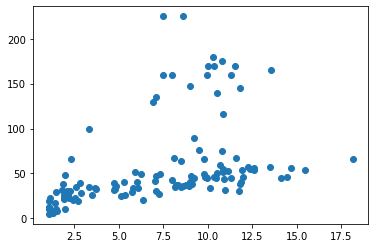

In [36]:
from matplotlib import pyplot

pyplot.scatter(penguins['Duration'], penguins['Depth'])
pyplot.show()

If we want axis labels, `matplotlib` needs to be told what they are:

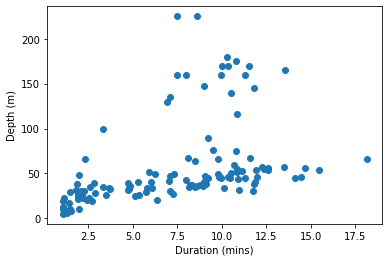

In [38]:
pyplot.scatter(penguins['Duration'], penguins['Depth'])
pyplot.xlabel('Duration (mins)')
pyplot.ylabel('Depth (m)')
pyplot.show()

If we want something as simple as just coloring a subset of the observations differently, then we have to first fetch the subset ourselves:

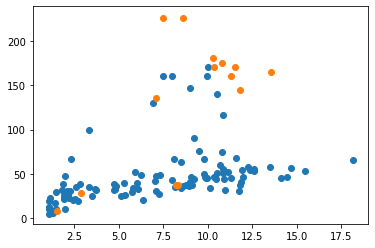

In [40]:
favorite_penguin = 'EP3901'

group1 = penguins[penguins['Bird'] != favorite_penguin]
group2 = penguins[penguins['Bird'] == favorite_penguin]

pyplot.scatter(group1['Duration'], group1['Depth'])
pyplot.scatter(group2['Duration'], group2['Depth'])
pyplot.show()

And note that this doesn't yet get us a legend showing what the two separate colors refer to. Like axis labels, legends have to be added explicitly.

Don't be a masochist. If you want a more complex figure with labels, legends, colors, and so on then use one of the other data visualization packages.

### pandas plots

A `pandas.DataFrame` has an [attribute](extras/glossary.ipynb#attribute) called `plot`. This attribute in turn stores several [methods](extras/glossary.ipynb#method) that can be used to plot the data from the data frame.

Let's take a look at these methods, using `dir()` (for brevity, we can omit printing the ubiquitous 'special methods' whose names begin with underscores):

In [43]:
for meth in dir(penguins.plot):
    if not meth.startswith('_'):
        print(meth)

area
bar
barh
box
density
hexbin
hist
kde
line
pie
scatter


There is a `scatter()` method, which is similar to the `scatter()` function from `matplotlib.pyplot` that we have already met (indeed, behind the scenes, this method uses `pyplot.scatter()`). The [arguments](extras/glossary.ipynb#argument) to the `scatter()` method specify which columns of data should be matched to the *x* and *y* axes of the figure.

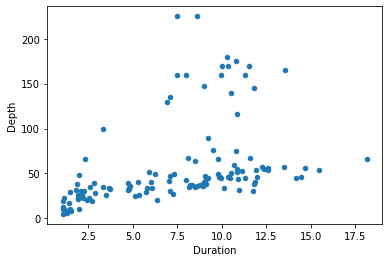

In [48]:
penguins.plot.scatter(x='Duration', y='Depth')
pyplot.show()

(Note that because `pandas` is still using `matplotlib` as the final means of creating the figure, we still use `matplotlib`'s `pyplot.show()` function to ensure the figure is displayed.)

`pandas`' plotting functions are not a huge improvement on `matplotlib`. The figure we just made is essentially the same one we got from `matplotlib` a moment ago, with just two small bonuses. First, as you may have noticed, we were able to specify the *x* and *y* arguments simply as column names (i.e. `'Duration` rather than `penguins['Duration']`), which makes for slightly briefer, clearer code. Second, `pandas` adds the column names as axis labels automatically, sparing us a little extra work.

Even this second bonus isn't always that useful. If the scales of measurement on our axes have specific units that are not already clear from the column names, then we should add these to make our figure clear. For this, we need to revert to the labeling functions from `pyplot`:

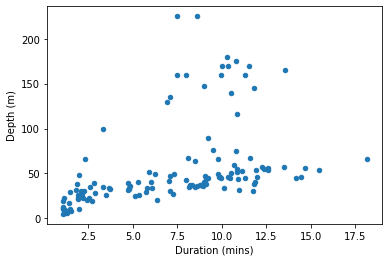

In [56]:
penguins.plot.scatter(x='Duration', y='Depth')
pyplot.xlabel('Duration (mins)')
pyplot.ylabel('Depth (m)')
pyplot.show()

If you want to explore a bit, you can head over to Spyder, load the penguins data yourself and try out a few of the other `pandas` plot functions from the list we printed above. But be prepared for some frustration; they are mostly of fairly limited use.

### seaborn

Now we will learn about our first data visualization package that is both relatively easy to use and genuinely useful. `seaborn` is included in the default Anaconda installation, so you do not need to install it.

`seaborn` provides a wider selection of plotting functions than `matplotlib` and `pandas`. The online documentation has a full [gallery of examples](https://seaborn.pydata.org/examples/index.html), which you can browse to get an idea of what is possible. Here we will stick to the same simple figure from above, so that we can make a clear comparison with `matplotlib` and `pandas`.

The figure we have been creating so far displays the observations (dives) as points in a 2D space, where two features of those observations (duration and depth) form the two axes of the space. This kind of figure is most commonly known as a 'scatterplot', and this is also the name of the `seaborn` function for creating it. The `x` and `y` [arguments](extras/glossary.ipynb#argument) to `scatterplot()` specify which columns of a data frame to use for the two respective axes, and the additional `data` argument tells `seaborn` which data frame these columns should be taken from.

(Note that the `x` and `y` arguments should be in quote marks, since these are just [string](extras/glossary.ipynb#string) names, not [variables](extras/glossary.ipynb#variable), but the `data` argument should be unquoted, because our data frame is a variable.)

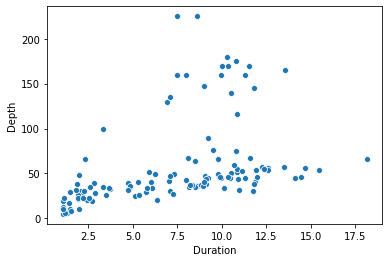

In [49]:
import seaborn

seaborn.scatterplot(x='Duration', y='Depth', data=penguins)
pyplot.show()

So far, so good. We get essentially the same plot that `pandas` gave us. And we can make the same sort of more detailed tweaks to axis labels and so on by reverting to `pyplot`:

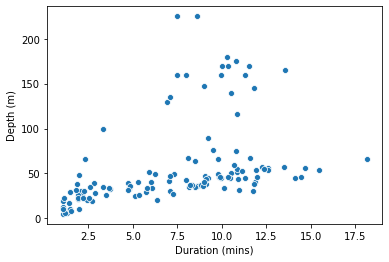

In [57]:
seaborn.scatterplot(x='Duration', y='Depth', data=penguins)
pyplot.xlabel('Duration (mins)')
pyplot.ylabel('Depth (m)')
pyplot.show()

But the really useful novelty of `seaborn` is revealed with a few additional keyword arguments. As well as just `x` and `y`, three more arguments `hue`, `style`, and `size` allow us to vary the color ('hue' essentially means 'color'), the point symbol, and the size of the points according to additional columns from the data frame.

For example, the `hue` argument provides a really simple solution to the problem of coloring subsets of the data that was so tedious in `matplotlib`:

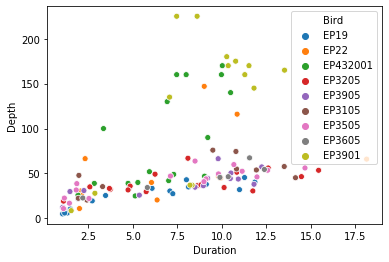

In [52]:
seaborn.scatterplot(x='Duration', y='Depth', hue='Bird', data=penguins)
pyplot.show()

And we get an automatic legend showing what the colors refer to. Praise the Lord!

These additional arguments are the best feature of `seaborn`. They allow us to show more than just two aspects of our data on one figure, with almost no extra effort. As another example, we can use the `size` argument to show how a third numerical quantity is related to the first two:

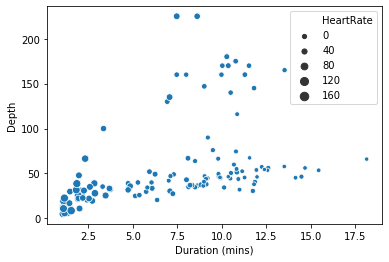

In [55]:
seaborn.scatterplot(x='Duration', y='Depth', size='HeartRate', data=penguins)
pyplot.show()

Here for example the different sizes of the points show us that the penguins' heart rates tend to be slower for the longer dives.

The functions for other figure types all work in more or less the same way: Assign column names to dimensions of the figure, such as `x`, `y`, `hue`, etc., and specify which data frame the columns should come from.

Go to the [seaborn examples gallery](https://seaborn.pydata.org/examples/index.html) and explore.

### Saving figures



### bokeh

### plotnine



## Exercise

